In [1]:
import networkx as nx
import pandas as pd
import scipy.stats as stats
import matplotlib

In [2]:
dataPath = "data/atp_matches_2018.csv"

data = pd.read_csv(dataPath) 
print(data)

                          tourney_id                tourney_name surface  \
0                          2018-M020                    Brisbane    Hard   
1                          2018-M020                    Brisbane    Hard   
2                          2018-M020                    Brisbane    Hard   
3                          2018-M020                    Brisbane    Hard   
4                          2018-M020                    Brisbane    Hard   
...                              ...                         ...     ...   
2884                       2018-0605                 Tour Finals    Hard   
2885                       2018-0605                 Tour Finals    Hard   
2886  2018-M-DC-2018-WG-M-FRA-CRO-01  Davis Cup WG F: FRA vs CRO    Clay   
2887  2018-M-DC-2018-WG-M-FRA-CRO-01  Davis Cup WG F: FRA vs CRO    Clay   
2888  2018-M-DC-2018-WG-M-FRA-CRO-01  Davis Cup WG F: FRA vs CRO    Clay   

      draw_size tourney_level  tourney_date  match_num  winner_id  \
0            32   

In [3]:
import pickle

with open("data/data_cleaned", 'wb') as file:
    pickle.dump(data, file)

In [4]:
import pickle

with open("data/data_cleaned", 'rb') as file:
    data = pickle.load(file)

In [5]:
list_winner = set(data['winner_name'].unique())
list_looser = set(data['loser_name'].unique())

skup_id = list_winner.union(list_looser)
print(f"Postoji { len(skup_id) } različitih igrača") # formatiranje ispisa pomoću fstringa

Postoji 419 različitih igrača


In [6]:
import numpy as np
import matplotlib.pyplot as plt

data['id'] = data.index

data_reduced = data[['winner_name', 'loser_name', 'winner_rank','loser_rank', 'winner_ioc', 'loser_ioc', 'id' ]]
print(data_reduced)

           winner_name          loser_name  winner_rank  loser_rank  \
0        Ryan Harrison      Leonardo Mayer         47.0        52.0   
1      Jared Donaldson     Jordan Thompson         54.0        94.0   
2        Denis Istomin       Damir Dzumhur         63.0        30.0   
3       Alex De Minaur       Steve Johnson        208.0        44.0   
4         Michael Mmoh   Federico Delbonis        175.0        68.0   
...                ...                 ...          ...         ...   
2884    Novak Djokovic      Kevin Anderson          1.0         6.0   
2885  Alexander Zverev      Novak Djokovic          5.0         1.0   
2886       Borna Coric       Jeremy Chardy         12.0        40.0   
2887       Marin Cilic  Jo-Wilfried Tsonga          7.0       259.0   
2888       Marin Cilic       Lucas Pouille          7.0        32.0   

     winner_ioc loser_ioc    id  
0           USA       ARG     0  
1           USA       AUS     1  
2           UZB       BIH     2  
3          

In [7]:
list_nations = []
for i in skup_id:
    print(i)
    if(len(data[(data['winner_name'] == i)]) > 0):
        result = data[(data['winner_name'] == i)]['winner_ioc']
        list_nations.append((result.iloc[0]))
    elif(len(data[(data['loser_name'] == i)]) > 0):
        result = data[(data['loser_name'] == i)]['loser_ioc']
        list_nations.append((result.iloc[0]))
    print(list_nations)

Nicolas Alvarez
['PER']
Joao Domingues
['PER', 'POR']
Ignacio Garcia
['PER', 'POR', 'PUR']
Denis Kudla
['PER', 'POR', 'PUR', 'USA']
Stefan Kozlov
['PER', 'POR', 'PUR', 'USA', 'USA']
Pedja Krstin
['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB']
Jay Clarke
['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR']
Marcelo Arevalo
['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA']
Frederico Ferreira Silva
['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR']
Benjamin Hassan
['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER']
Artem Smirnov
['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR']
Thiago Seyboth Wild
['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA']
Julien Cagnina
['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL']
Alejandro Gonzalez
['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL']
Albert Ramos
['PER', 'POR', 'P

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB']
Nino Serdarusic
['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO']
Leonardo Mayer
['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN']
Jurabek Karimov
['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'A

Matteo Berrettini
['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA']
Michal Przysiezny
['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MD

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL']
Hubert Hurkacz
['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GE

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL', 'POL', 'TPE', 'TPE', 'AUT', 'LTU', 'SVK', 'CZE', 'FRA', 'IND', 'ARG', 'TPE', 'AUS'

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL', 'POL', 'TPE', 'TPE', 'AUT', 'LTU', 'SVK', 'CZE', 'FRA', 'IND', 'ARG', 'TPE', 'AUS'

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL', 'POL', 'TPE', 'TPE', 'AUT', 'LTU', 'SVK', 'CZE', 'FRA', 'IND', 'ARG', 'TPE', 'AUS'

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL', 'POL', 'TPE', 'TPE', 'AUT', 'LTU', 'SVK', 'CZE', 'FRA', 'IND', 'ARG', 'TPE', 'AUS'

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL', 'POL', 'TPE', 'TPE', 'AUT', 'LTU', 'SVK', 'CZE', 'FRA', 'IND', 'ARG', 'TPE', 'AUS'

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL', 'POL', 'TPE', 'TPE', 'AUT', 'LTU', 'SVK', 'CZE', 'FRA', 'IND', 'ARG', 'TPE', 'AUS'

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL', 'POL', 'TPE', 'TPE', 'AUT', 'LTU', 'SVK', 'CZE', 'FRA', 'IND', 'ARG', 'TPE', 'AUS'

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL', 'POL', 'TPE', 'TPE', 'AUT', 'LTU', 'SVK', 'CZE', 'FRA', 'IND', 'ARG', 'TPE', 'AUS'

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL', 'POL', 'TPE', 'TPE', 'AUT', 'LTU', 'SVK', 'CZE', 'FRA', 'IND', 'ARG', 'TPE', 'AUS'

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL', 'POL', 'TPE', 'TPE', 'AUT', 'LTU', 'SVK', 'CZE', 'FRA', 'IND', 'ARG', 'TPE', 'AUS'

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL', 'POL', 'TPE', 'TPE', 'AUT', 'LTU', 'SVK', 'CZE', 'FRA', 'IND', 'ARG', 'TPE', 'AUS'

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL', 'POL', 'TPE', 'TPE', 'AUT', 'LTU', 'SVK', 'CZE', 'FRA', 'IND', 'ARG', 'TPE', 'AUS'

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL', 'POL', 'TPE', 'TPE', 'AUT', 'LTU', 'SVK', 'CZE', 'FRA', 'IND', 'ARG', 'TPE', 'AUS'

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL', 'POL', 'TPE', 'TPE', 'AUT', 'LTU', 'SVK', 'CZE', 'FRA', 'IND', 'ARG', 'TPE', 'AUS'

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL', 'POL', 'TPE', 'TPE', 'AUT', 'LTU', 'SVK', 'CZE', 'FRA', 'IND', 'ARG', 'TPE', 'AUS'

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL', 'POL', 'TPE', 'TPE', 'AUT', 'LTU', 'SVK', 'CZE', 'FRA', 'IND', 'ARG', 'TPE', 'AUS'

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL', 'POL', 'TPE', 'TPE', 'AUT', 'LTU', 'SVK', 'CZE', 'FRA', 'IND', 'ARG', 'TPE', 'AUS'

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL', 'POL', 'TPE', 'TPE', 'AUT', 'LTU', 'SVK', 'CZE', 'FRA', 'IND', 'ARG', 'TPE', 'AUS'

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL', 'POL', 'TPE', 'TPE', 'AUT', 'LTU', 'SVK', 'CZE', 'FRA', 'IND', 'ARG', 'TPE', 'AUS'

['PER', 'POR', 'PUR', 'USA', 'USA', 'SRB', 'GBR', 'ESA', 'POR', 'GER', 'UKR', 'BRA', 'BEL', 'COL', 'ESP', 'USA', 'NOR', 'FIN', 'ITA', 'ESP', 'GER', 'KOR', 'BRA', 'AUT', 'USA', 'URU', 'GER', 'MDA', 'ITA', 'ARG', 'USA', 'ZIM', 'SUI', 'ITA', 'POR', 'IRL', 'ESP', 'PAK', 'USA', 'FRA', 'RUS', 'VEN', 'BUL', 'ZIM', 'ESP', 'MAR', 'TUR', 'FRA', 'RSA', 'ESP', 'TUN', 'SVK', 'PER', 'CYP', 'ESP', 'BLR', 'ARG', 'GRE', 'SRB', 'CRO', 'ARG', 'USA', 'ARG', 'ARG', 'HKG', 'BRA', 'EGY', 'IND', 'LUX', 'DEN', 'MAR', 'LAT', 'TPE', 'AUT', 'KAZ', 'AUS', 'USA', 'LTU', 'BAR', 'ROU', 'CAN', 'AUS', 'ITA', 'CAN', 'UZB', 'FRA', 'ITA', 'ITA', 'NED', 'FRA', 'AUT', 'ROU', 'POR', 'ESP', 'FRA', 'SUI', 'ESP', 'FRA', 'FRA', 'THA', 'USA', 'GEO', 'ITA', 'ITA', 'FRA', 'GER', 'PAK', 'ITA', 'PER', 'ITA', 'POL', 'RSA', 'FRA', 'COL', 'IRL', 'FRA', 'ROU', 'GER', 'ESP', 'ARG', 'DEN', 'SLO', 'USA', 'GER', 'SRI', 'SVK', 'VEN', 'NOR', 'NED', 'ESP', 'BUL', 'POL', 'TPE', 'TPE', 'AUT', 'LTU', 'SVK', 'CZE', 'FRA', 'IND', 'ARG', 'TPE', 'AUS'

In [36]:
list_rank_points = []
for i in skup_id:
    print(i)
    if(len(data[(data['winner_name'] == i)]) > 0):
        result = data[(data['winner_name'] == i)]['winner_rank_points']
        list_rank_points.append((result.iloc[-1]))
    elif(len(data[(data['loser_name'] == i)]) > 0):
        result = data[(data['loser_name'] == i)]['loser_rank_points']
        list_rank_points.append((result.iloc[-1]))

Nicolas Alvarez
Joao Domingues
Ignacio Garcia
Denis Kudla
Stefan Kozlov
Pedja Krstin
Jay Clarke
Marcelo Arevalo
Frederico Ferreira Silva
Benjamin Hassan
Artem Smirnov
Thiago Seyboth Wild
Julien Cagnina
Alejandro Gonzalez
Albert Ramos
Steve Johnson
Peter August Anker
Emil Ruusuvuori
Andrea Arnaboldi
Nicolas Almagro
Yannick Maden
Hyeon Chung
Rogerio Dutra Silva
Jurgen Melzer
Bradley Klahn
Pablo Cuevas
Rudolf Molleker
Radu Albot
Stefano Travaglia
Nicolas Kicker
Jack Sock
Benjamin Lock
Sandro Ehrat
Marco Cecchinato
Joao Sousa
Peter Bothwell
Tommy Robredo
M Abid Ali Khan Akbar
Tommy Paul
Quentin Halys
Evgeny Karlovskiy
Brandon Perez
Dimitar Kuzmanov
Mark Chigaazira
Luis Diego Chavez Villalpando
Soufiane El Mesbahi
Altug Celikbilek
Maxime Janvier
Lloyd Harris
Ricardo Ojeda Lara
Aziz Dougaz
Filip Horansky
Mauricio Echazu
Marcos Baghdatis
Pablo Carreno Busta
Ilya Ivashka
Carlos Berlocq
Stefanos Tsitsipas
Novak Djokovic
Nino Serdarusic
Leonardo Mayer
Taylor Fritz
Pedro Cachin
Federico Delbonis


In [37]:
list_rank = []
for i in skup_id:
    if(len(data[(data['winner_name'] == i)]) > 0):
        result = data[(data['winner_name'] == i)]['winner_rank']
        list_rank.append((result.iloc[-1]))
    elif(len(data[(data['loser_name'] == i)]) > 0):
        result = data[(data['loser_name'] == i)]['loser_rank']
        list_rank.append((result.iloc[-1]))
for i in range(len(list_rank)):
        if(np.isnan(list_rank[i])):
            list_rank[i] = 0

for i in range(0, len(list_rank)): 
    list_rank[i] = int(list_rank[i])

In [152]:
G = nx.Graph() # pravi praznu mrežu
for i in range(len(skup_id)):
    G.add_node(list(skup_id)[i], ioc = list_nations[i], rankpoints = list_rank_points[i], rank = list_rank[i] ) # dodaje čvorove čije su labele u "skup_id"

In [153]:
for _, winner_name, loser_name, winner_rank, loser_rank, winner_ioc, loser_ioc, _  in data_reduced.itertuples():
    if (winner_name, loser_name) in G.edges:
        G.edges[winner_name, loser_name]['weight'] += 1
    else:
        G.add_edge(winner_name, loser_name, weight=1)

In [154]:
print(G.edges.data("weight"))

[('Nicolas Alvarez', 'Luis Patino', 1), ('Joao Domingues', 'Renzo Olivo', 1), ('Joao Domingues', 'Fabio Fognini', 1), ('Joao Domingues', 'Simone Bolelli', 1), ('Ignacio Garcia', 'Manuel Sanchez', 1), ('Ignacio Garcia', 'Luis Patino', 1), ('Denis Kudla', 'Steve Johnson', 1), ('Denis Kudla', 'Dominic Thiem', 1), ('Denis Kudla', 'Fernando Verdasco', 1), ('Denis Kudla', 'Ivo Karlovic', 1), ('Denis Kudla', 'Damir Dzumhur', 1), ('Denis Kudla', 'Marton Fucsovics', 1), ('Denis Kudla', 'Lukas Lacko', 2), ('Denis Kudla', 'Stefanos Tsitsipas', 1), ('Denis Kudla', 'Yuichi Sugita', 1), ('Denis Kudla', 'Roger Federer', 1), ('Denis Kudla', 'Lucas Pouille', 2), ('Denis Kudla', 'Ruben Bemelmans', 1), ('Denis Kudla', 'Ramkumar Ramanathan', 1), ('Denis Kudla', 'Karen Khachanov', 1), ('Denis Kudla', 'Andrey Rublev', 2), ('Denis Kudla', 'Nick Kyrgios', 1), ('Denis Kudla', 'Matteo Berrettini', 1), ('Denis Kudla', 'Juan Martin del Potro', 1), ('Denis Kudla', 'Yoshihito Nishioka', 1), ('Denis Kudla', 'Richard

In [41]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 419
Number of edges: 2489
Average degree:  11.8807


In [42]:
output_path = "models/undirected_2018_country_rank.gml"

nx.write_gml(G, output_path)

In [14]:
G.nodes.data()

NodeDataView({'Nicolas Alvarez': {'ioc': 'PER', 'rankpoints': 18.0}, 'Joao Domingues': {'ioc': 'POR', 'rankpoints': 279.0}, 'Ignacio Garcia': {'ioc': 'PUR', 'rankpoints': nan}, 'Denis Kudla': {'ioc': 'USA', 'rankpoints': 827.0}, 'Stefan Kozlov': {'ioc': 'USA', 'rankpoints': 313.0}, 'Pedja Krstin': {'ioc': 'SRB', 'rankpoints': 320.0}, 'Jay Clarke': {'ioc': 'GBR', 'rankpoints': 245.0}, 'Marcelo Arevalo': {'ioc': 'ESA', 'rankpoints': 253.0}, 'Frederico Ferreira Silva': {'ioc': 'POR', 'rankpoints': 198.0}, 'Benjamin Hassan': {'ioc': 'GER', 'rankpoints': 117.0}, 'Artem Smirnov': {'ioc': 'UKR', 'rankpoints': 66.0}, 'Thiago Seyboth Wild': {'ioc': 'BRA', 'rankpoints': 44.0}, 'Julien Cagnina': {'ioc': 'BEL', 'rankpoints': 212.0}, 'Alejandro Gonzalez': {'ioc': 'COL', 'rankpoints': 159.0}, 'Albert Ramos': {'ioc': 'ESP', 'rankpoints': 805.0}, 'Steve Johnson': {'ioc': 'USA', 'rankpoints': 1340.0}, 'Peter August Anker': {'ioc': 'NOR', 'rankpoints': nan}, 'Emil Ruusuvuori': {'ioc': 'FIN', 'rankpoints

In [18]:
data_average = data[['winner_name', 'loser_name', 'tourney_id']]
print(data_average)

           winner_name          loser_name                      tourney_id
0        Ryan Harrison      Leonardo Mayer                       2018-M020
1      Jared Donaldson     Jordan Thompson                       2018-M020
2        Denis Istomin       Damir Dzumhur                       2018-M020
3       Alex De Minaur       Steve Johnson                       2018-M020
4         Michael Mmoh   Federico Delbonis                       2018-M020
...                ...                 ...                             ...
2884    Novak Djokovic      Kevin Anderson                       2018-0605
2885  Alexander Zverev      Novak Djokovic                       2018-0605
2886       Borna Coric       Jeremy Chardy  2018-M-DC-2018-WG-M-FRA-CRO-01
2887       Marin Cilic  Jo-Wilfried Tsonga  2018-M-DC-2018-WG-M-FRA-CRO-01
2888       Marin Cilic       Lucas Pouille  2018-M-DC-2018-WG-M-FRA-CRO-01

[2889 rows x 3 columns]


In [19]:
list_winner = set(data['winner_name'].unique())
list_looser = set(data['loser_name'].unique())
list_tournament = set(data['tourney_id'].unique())

skup_id_turnir = list_winner.union(list_looser)
skup_id_turnir = skup_id_turnir.union(list_tournament)
print(f"Postoji { len(skup_id_turnir) } različitih igrača") # formatiranje ispisa pomoću fstring
print(skup_id_turnir)

Postoji 554 različitih igrača
{'Nicolas Alvarez', '2018-M-DC-2018-WG-M-FRA-CRO-01', 'Joao Domingues', 'Ignacio Garcia', 'Denis Kudla', '2018-M-DC-2018-G1-AM-M-DOM-BRA-01', '2018-0429', 'Stefan Kozlov', 'Pedja Krstin', 'Jay Clarke', '2018-M-DC-2018-G2-EPA-M-TUN-FIN-01', 'Marcelo Arevalo', 'Frederico Ferreira Silva', '2018-580', 'Benjamin Hassan', 'Artem Smirnov', 'Thiago Seyboth Wild', '2018-M-DC-2018-G1-EPA-M-RSA-ISR-01', '2018-7161', 'Julien Cagnina', 'Alejandro Gonzalez', 'Albert Ramos', '2018-M-DC-2018-G1-EPA-M-AUT-BLR-01', 'Steve Johnson', '2018-M-DC-2018-G2-AM-M-URU-MEX-01', 'Peter August Anker', 'Emil Ruusuvuori', 'Andrea Arnaboldi', '2018-0314', 'Nicolas Almagro', 'Yannick Maden', '2018-0891', 'Hyeon Chung', 'Rogerio Dutra Silva', '2018-0341', 'Jurgen Melzer', '2018-M-DC-2018-G2-AO-M-THA-SRI-01', 'Bradley Klahn', 'Pablo Cuevas', 'Rudolf Molleker', 'Radu Albot', 'Stefano Travaglia', 'Nicolas Kicker', 'Jack Sock', '2018-7696', 'Benjamin Lock', 'Sandro Ehrat', '2018-M-DC-2018-WG-PO

In [27]:
M = nx.Graph() # pravi praznu mrežu
M.add_nodes_from(skup_id_turnir) # dodaje čvorove čije su labele u "skup_id"

In [33]:
for _, winner_name, loser_name , tourney_id in data_average.itertuples():
    if (winner_name, tourney_id) in M.edges:
        M.edges[winner_name, tourney_id]['weight'] += 1
    else:
        M.add_edge(winner_name, tourney_id, weight=1)
    if (loser_name, tourney_id) in M.edges:
        M.edges[loser_name, tourney_id]['weight'] += 1
    else:
        M.add_edge(loser_name, tourney_id, weight=1)

In [34]:
print(M.edges.data("weight"))

[('Nicolas Alvarez', '2018-M-DC-2018-G2-AM-M-MEX-PER-01', 3), ('2018-M-DC-2018-WG-M-FRA-CRO-01', 'Borna Coric', 3), ('2018-M-DC-2018-WG-M-FRA-CRO-01', 'Jeremy Chardy', 3), ('2018-M-DC-2018-WG-M-FRA-CRO-01', 'Marin Cilic', 6), ('2018-M-DC-2018-WG-M-FRA-CRO-01', 'Jo-Wilfried Tsonga', 3), ('2018-M-DC-2018-WG-M-FRA-CRO-01', 'Lucas Pouille', 3), ('Joao Domingues', '2018-0533', 6), ('Joao Domingues', '2018-7290', 3), ('Ignacio Garcia', '2018-M-DC-2018-G2-AM-M-PUR-MEX-01', 6), ('Denis Kudla', '2018-580', 6), ('Denis Kudla', '2018-0717', 6), ('Denis Kudla', '2018-520', 3), ('Denis Kudla', '2018-0321', 3), ('Denis Kudla', '2018-0500', 12), ('Denis Kudla', '2018-540', 3), ('Denis Kudla', '2018-0315', 6), ('Denis Kudla', '2018-M035', 12), ('Denis Kudla', '2018-M024', 3), ('Denis Kudla', '2018-560', 6), ('Denis Kudla', '2018-6967', 3), ('Denis Kudla', '2018-0329', 3), ('Denis Kudla', '2018-0429', 6), ('Denis Kudla', '2018-0337', 3), ('2018-M-DC-2018-G1-AM-M-DOM-BRA-01', 'Jose Hernandez', 6), ('201

In [35]:
output_path = "models/undirected_average_model_2018.gml"

nx.write_gml(M, output_path)

In [25]:
nx.degree_centrality(M)

{'Nicolas Alvarez': 0.0018083182640144665,
 '2018-M-DC-2018-WG-M-FRA-CRO-01': 0.003616636528028933,
 'Joao Domingues': 0.0018083182640144665,
 'Ignacio Garcia': 0.0,
 'Denis Kudla': 0.012658227848101266,
 '2018-M-DC-2018-G1-AM-M-DOM-BRA-01': 0.0054249547920434,
 '2018-0429': 0.028933092224231464,
 'Stefan Kozlov': 0.0,
 'Pedja Krstin': 0.003616636528028933,
 'Jay Clarke': 0.0018083182640144665,
 '2018-M-DC-2018-G2-EPA-M-TUN-FIN-01': 0.0054249547920434,
 'Marcelo Arevalo': 0.0018083182640144665,
 'Frederico Ferreira Silva': 0.0,
 '2018-580': 0.11573236889692586,
 'Benjamin Hassan': 0.0054249547920434,
 'Artem Smirnov': 0.0,
 'Thiago Seyboth Wild': 0.0,
 '2018-M-DC-2018-G1-EPA-M-RSA-ISR-01': 0.0054249547920434,
 '2018-7161': 0.02531645569620253,
 'Julien Cagnina': 0.0,
 'Alejandro Gonzalez': 0.003616636528028933,
 'Albert Ramos': 0.02531645569620253,
 '2018-M-DC-2018-G1-EPA-M-AUT-BLR-01': 0.0054249547920434,
 'Steve Johnson': 0.019891500904159132,
 '2018-M-DC-2018-G2-AM-M-URU-MEX-01': 0.

In [15]:
BC_dict = nx.betweenness_centrality(G)

In [16]:
df3 = pd.DataFrame.from_dict(BC_dict, orient='index', columns=['BC'])

In [17]:
df3.sort_values(
   by="BC"
)

,BC
Nicolas Alvarez,0.000000
Muzammil Murtaza,0.000000
Jordi Samper Montana,0.000000
Michal Przysiezny,0.000000
Cristian Rodriguez,0.000000
...,...
Jiri Vesely,0.030991
Marius Copil,0.031028
Fabio Fognini,0.033726
Malek Jaziri,0.043867


In [153]:
sorted(G.degree, key=lambda x: x[1], reverse=False)

[('Minjong Park', 1),
 ('Brandon Perez', 1),
 ('Kuan Yi Lee', 1),
 ('Renzo Olivo', 1),
 ('Hugo Gaston', 1),
 ('Seong Chan Hong', 1),
 ('Aleksandar Vukic', 1),
 ('Federico Zeballos', 1),
 ('Yshai Oliel', 1),
 ('Pedro Cachin', 1),
 ('Lucas Catarina', 1),
 ('Ainius Sabaliauskas', 1),
 ('Frederico Ferreira Silva', 1),
 ('Cheng Yu Yu', 1),
 ('Muzammil Murtaza', 1),
 ('Francisco Llanes', 1),
 ('Darko Bojanovic', 1),
 ('Viktor Durasovic', 1),
 ('Gonzalo Lama', 1),
 ('Julien Cagnina', 1),
 ('Benjamin Bonzi', 1),
 ('Collin Altamirano', 1),
 ('Nicolas Alvarez', 1),
 ('Elliot Benchetrit', 1),
 ('Jabor Al Mutawa', 1),
 ('George Tsivadze', 1),
 ('Mehluli Don Ayanda Sibanda', 1),
 ('Adrian Andreev', 1),
 ('Matteo Viola', 1),
 ('Ivan Endara', 1),
 ('Blaz Rola', 1),
 ('Altug Celikbilek', 1),
 ('Moez Chargui', 1),
 ('Rodrigo Arus', 1),
 ('Luca Vanni', 1),
 ('Yaraslau Shyla', 1),
 ('Max Purcell', 1),
 ('Christoffer Konigsfeldt', 1),
 ('Sandro Ehrat', 1),
 ('Mauricio Echazu', 1),
 ('Ti Chen', 1),
 ('Sime

In [93]:
# asortativnost na osnovu netežinskog stepena čvora
r1 = nx.degree_assortativity_coefficient(G)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}")

# asortativnost na osnovu težinskog stepena čvora
r2 = nx.degree_assortativity_coefficient(G, weight='weight')
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}")

Koeficijent asortativnosti na osnovu netežinskog stepena čvora: 0.21868975600564688
Koeficijent asortativnosti na osnovu težinskog stepena čvora: 0.22945507317379313


In [95]:
from collections import Counter
from operator import itemgetter

def plot_deg_frequency(G, weighted=False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({1: 123, 2: 52, 3: 36, 4: 23, 5: 15, 6: 12, 9: 10, 39: 8, 34: 6, 14: 6, 12: 6, 42: 6, 40: 6, 35: 6, 22: 5, 46: 5, 25: 5, 16: 5, 8: 5, 33: 5, 10: 5, 43: 4, 37: 4, 19: 4, 49: 4, 11: 4, 13: 4, 20: 4, 29: 3, 30: 3, 47: 3, 44: 3, 7: 3, 23: 2, 48: 2, 45: 2, 27: 2, 15: 2, 17: 2, 36: 2, 26: 2, 28: 1, 50: 1, 18: 1, 21: 1, 52: 1, 38: 1, 61: 1, 53: 1, 51: 1, 55: 1})


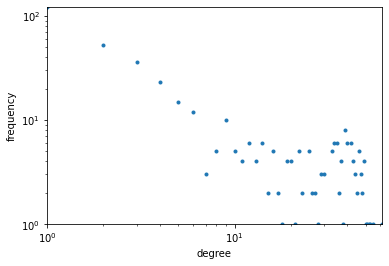

In [96]:
plot_deg_frequency(G)

Counter({1: 123, 2: 50, 3: 37, 4: 22, 5: 16, 6: 13, 9: 8, 14: 7, 10: 7, 43: 6, 48: 5, 8: 5, 47: 5, 13: 5, 29: 4, 12: 4, 25: 4, 16: 4, 33: 4, 22: 3, 65: 3, 46: 3, 50: 3, 27: 3, 53: 3, 20: 3, 15: 3, 56: 3, 38: 3, 11: 3, 34: 2, 61: 2, 58: 2, 35: 2, 57: 2, 49: 2, 19: 2, 55: 2, 18: 2, 45: 2, 39: 2, 21: 2, 36: 2, 7: 2, 51: 2, 31: 2, 59: 2, 41: 2, 23: 2, 60: 1, 24: 1, 64: 1, 28: 1, 44: 1, 66: 1, 17: 1, 37: 1, 77: 1, 52: 1, 32: 1, 70: 1, 73: 1, 54: 1, 67: 1, 75: 1, 30: 1, 40: 1, 63: 1})


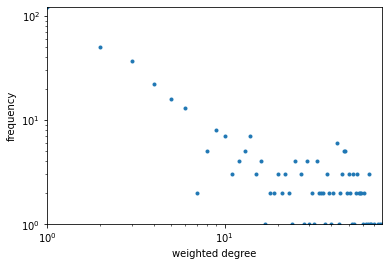

In [97]:
plot_deg_frequency(G, weighted = True)

In [148]:
ER = nx.erdos_renyi_graph(len(skup_id), 0.0277)

In [149]:
print(nx.info(ER))

Name: 
Type: Graph
Number of nodes: 419
Number of edges: 2487
Average degree:  11.8711


In [155]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 419
Number of edges: 2489
Average degree:  11.8807


In [154]:
#print(nx.average_shortest_path_length(G))
print(nx.average_shortest_path_length(ER))

2.7031323154925717


In [152]:
print(nx.is_connected(G))

False


In [156]:
print(nx.number_connected_components(G))

18


In [158]:
for g in nx.connected_component_subgraphs(G): 
    print(nx.average_shortest_path_length(g))
    print(nx.info(g))

3.137704918032787
Name: 
Type: Graph
Number of nodes: 366
Number of edges: 2449
Average degree:  13.3825
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
3.146198830409357
Name: 
Type: Graph
Number of nodes: 19
Number of edges: 22
Average degree:   2.3158
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.5
Name: 
Type: Graph
Number of nodes: 4
Number of edges: 3
Average degree:   1.5000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Gr

In [161]:
Duzina = 3.137704918032787/2.7031323154925717
Duzina

1.1607663080528954

In [170]:
import networkx.algorithms.approximation
ccER = nx.algorithms.approximation.clustering_coefficient.average_clustering(ER)
ccG = nx.algorithms.approximation.clustering_coefficient.average_clustering(G)

In [171]:
ccG/ccER

3.7297297297297303

### Novak DJokovic

Čvorovi ego mreže igrača crraii su ['Nikoloz Basilashvili', 'Juan Martin del Potro', 'Marin Cilic', 'Jaume Munar', 'Kevin Anderson', 'Tennys Sandgren', 'Kei Nishikori', 'Alexandr Dolgopolov', 'Rafael Nadal', 'Stefanos Tsitsipas', 'Novak Djokovic', 'Albert Ramos', 'Steve Johnson', 'Kyle Edmund', 'Dominic Thiem', 'Jeremy Chardy', 'Damir Dzumhur', 'Taro Daniel', 'Grigor Dimitrov', 'Alexander Zverev', 'Roger Federer', 'Hyeon Chung', 'Rogerio Dutra Silva', 'Fernando Verdasco', 'Adrian Mannarino', 'Richard Gasquet', 'Dusan Lajovic', 'Mirza Basic', 'Peter Polansky', 'Roberto Bautista Agut', 'Marton Fucsovics', 'Benoit Paire', 'Horacio Zeballos', 'John Millman', 'Milos Raonic', 'Marco Cecchinato', 'Joao Sousa', 'John Isner', 'Karen Khachanov', 'Gael Monfils', 'Borna Coric', 'Donald Young', 'Martin Klizan']


C:\Users\Djole\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


{('Nikoloz Basilashvili',
  'Borna Coric'): Text(0.9527240693200567, -0.21222842154721677, '2'),
 ('Nikoloz Basilashvili',
  'Kyle Edmund'): Text(0.3385598207323217, 0.4732199126082607, '2'),
 ('Nikoloz Basilashvili',
  'Steve Johnson'): Text(0.40918157948680345, 0.49168283877202473, '1'),
 ('Nikoloz Basilashvili',
  'Tennys Sandgren'): Text(0.8723860978085181, 0.33365942165280976, '1'),
 ('Nikoloz Basilashvili',
  'Kevin Anderson'): Text(0.9169988929578203, 0.27588389436891564, '3'),
 ('Nikoloz Basilashvili',
  'Joao Sousa'): Text(0.7604701517144808, -0.4267965449359155, '1'),
 ('Nikoloz Basilashvili',
  'Jeremy Chardy'): Text(0.2090705030950032, 0.4066448622023474, '1'),
 ('Nikoloz Basilashvili',
  'Gael Monfils'): Text(0.916998863155498, -0.27588393214162665, '1'),
 ('Nikoloz Basilashvili',
  'Novak Djokovic'): Text(0.554685625831763, 0.49700049696212983, '1'),
 ('Nikoloz Basilashvili',
  'Dusan Lajovic'): Text(0.10425171186222798, -0.3055868042026739, '2'),
 ('Nikoloz Basilashvili'

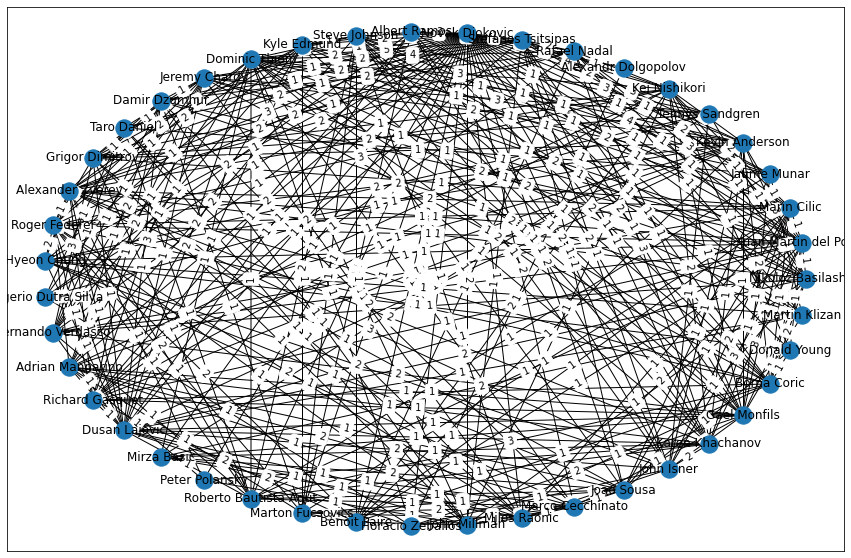

In [46]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza = nx.ego_graph(G, 'Novak Djokovic')
print(f"Čvorovi ego mreže igrača crraii su {ego_mreza.nodes}")
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza,'weight')
pos = nx.circular_layout(ego_mreza)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza, pos)
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels = tezine_grana)

In [174]:
output_path = "models/Novak_2018.gml"

nx.write_gml(ego_mreza, output_path)

In [53]:
for i in range(len(list(ego_mreza.nodes))):
    print(list(ego_mreza.nodes)[i])

Nikoloz Basilashvili
Juan Martin del Potro
Marin Cilic
Jaume Munar
Kevin Anderson
Tennys Sandgren
Kei Nishikori
Alexandr Dolgopolov
Rafael Nadal
Stefanos Tsitsipas
Novak Djokovic
Albert Ramos
Steve Johnson
Kyle Edmund
Dominic Thiem
Jeremy Chardy
Damir Dzumhur
Taro Daniel
Grigor Dimitrov
Alexander Zverev
Roger Federer
Hyeon Chung
Rogerio Dutra Silva
Fernando Verdasco
Adrian Mannarino
Richard Gasquet
Dusan Lajovic
Mirza Basic
Peter Polansky
Roberto Bautista Agut
Marton Fucsovics
Benoit Paire
Horacio Zeballos
John Millman
Milos Raonic
Marco Cecchinato
Joao Sousa
John Isner
Karen Khachanov
Gael Monfils
Borna Coric
Donald Young
Martin Klizan


In [56]:
Ego_node_Novak = G
for i in range(len(list(ego_mreza.nodes))):
    print(list(ego_mreza.nodes)[i])
    Ego_node_Novak = nx.contracted_nodes(Ego_node_Novak, 'Novak Djokovic', list(ego_mreza.nodes)[i])

Nikoloz Basilashvili
Juan Martin del Potro
Marin Cilic
Jaume Munar
Kevin Anderson
Tennys Sandgren
Kei Nishikori
Alexandr Dolgopolov
Rafael Nadal
Stefanos Tsitsipas
Novak Djokovic
Albert Ramos
Steve Johnson
Kyle Edmund
Dominic Thiem
Jeremy Chardy
Damir Dzumhur
Taro Daniel
Grigor Dimitrov
Alexander Zverev
Roger Federer
Hyeon Chung
Rogerio Dutra Silva
Fernando Verdasco
Adrian Mannarino
Richard Gasquet
Dusan Lajovic
Mirza Basic
Peter Polansky
Roberto Bautista Agut
Marton Fucsovics
Benoit Paire
Horacio Zeballos
John Millman
Milos Raonic
Marco Cecchinato
Joao Sousa
John Isner
Karen Khachanov
Gael Monfils
Borna Coric
Donald Young
Martin Klizan


In [57]:
print(nx.info(Ego_node_Novak))

Name: 
Type: Graph
Number of nodes: 377
Number of edges: 1333
Average degree:   7.0716


In [91]:
for (n, d) in Ego_node_Novak.nodes(data=True):
    if('contraction' in d):
        del d['contraction']

In [92]:
output_path = "models/Novak_2018_egonode.gml"

nx.write_gml(Ego_node_Novak, output_path)

### Rafael Nadal

In [96]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza_nadal = nx.ego_graph(G, 'Rafael Nadal')
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza_nadal,'weight')
pos = nx.circular_layout(ego_mreza_nadal)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
#nx.draw_networkx(ego_mreza, pos)
#nx.draw_networkx_edge_labels(ego_mreza_nadal, pos, edge_labels = tezine_grana)

<Figure size 1080x720 with 0 Axes>

In [97]:
output_path = "models/Nadal_2018.gml"

nx.write_gml(ego_mreza_nadal, output_path)

In [164]:
print(nx.info(ego_mreza_nadal))

Name: 
Type: Graph
Number of nodes: 36
Number of edges: 229
Average degree:  12.7222


In [98]:
#Spajanje ego mreze u jedan cvor

In [99]:
Ego_node_Rafa = G
for i in range(len(list(ego_mreza_nadal.nodes))):
    Ego_node_Rafa = nx.contracted_nodes(Ego_node_Rafa, 'Rafael Nadal', list(ego_mreza_nadal.nodes)[i])

In [100]:
print(nx.info(Ego_node_Rafa))

Name: 
Type: Graph
Number of nodes: 384
Number of edges: 1523
Average degree:   7.9323


In [102]:
for (n, d) in Ego_node_Rafa.nodes(data=True):
    if('contraction' in d):
        del d['contraction']

In [103]:
output_path = "models/Rafa_2018_egonode.gml"

nx.write_gml(Ego_node_Rafa, output_path)

### Roger Federer

{('Daniil Medvedev',
  'Philipp Kohlschreiber'): Text(0.9951340258540431, 0.06958655555736672, '1'),
 ('Daniil Medvedev',
  'Fabio Fognini'): Text(0.9240240461214964, -0.26495962759224895, '1'),
 ('Daniil Medvedev',
  'Thanasi Kokkinakis'): Text(0.7795964498422188, 0.4145187734638691, '1'),
 ('Daniil Medvedev',
  'Hyeon Chung'): Text(0.010926225356233776, -0.10395589033668137, '1'),
 ('Daniil Medvedev',
  'Richard Gasquet'): Text(0.05852619624082206, -0.23473575161459398, '1'),
 ('Daniil Medvedev',
  'Andreas Seppi'): Text(0.8345653726992674, -0.37157236862153425, '2'),
 ('Daniil Medvedev',
  'Alexander Zverev'): Text(0.0012179699104138964, 0.034878238486967424, '2'),
 ('Daniil Medvedev',
  'Marton Fucsovics'): Text(0.44773583589622323, -0.4972609501981786, '1'),
 ('Daniil Medvedev',
  'Kei Nishikori'): Text(0.51744975192557, 0.49969541943997786, '2'),
 ('Daniil Medvedev',
  'Robin Haase'): Text(0.8830221603451252, -0.32139387102384015, '1'),
 ('Daniil Medvedev',
  'Jeremy Chardy'): Te

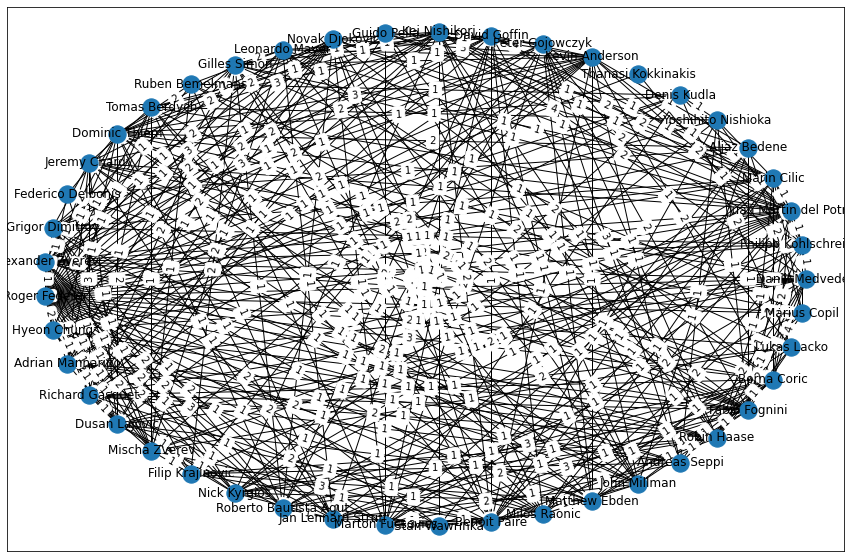

In [105]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza_roger = nx.ego_graph(G, 'Roger Federer')
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza_roger,'weight')
pos = nx.circular_layout(ego_mreza_roger)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza_roger, pos)
nx.draw_networkx_edge_labels(ego_mreza_roger, pos, edge_labels = tezine_grana)

In [106]:
output_path = "models/Roger_2018.gml"

nx.write_gml(ego_mreza_roger, output_path)

In [107]:
Ego_node_Roger = G
for i in range(len(list(ego_mreza_roger.nodes))):
    Ego_node_Roger = nx.contracted_nodes(Ego_node_Roger, 'Roger Federer', list(ego_mreza_roger.nodes)[i])

for (n, d) in Ego_node_Roger.nodes(data=True):
    if('contraction' in d):
        del d['contraction']

        
output_path = "models/Roger_2018_egonode.gml"

nx.write_gml(Ego_node_Roger, output_path)

### Distribucije

In [82]:
#25
list_tournament = set(data['tourney_name'].unique())

In [83]:
list_surface = []
for i in list_tournament:
    print(i)
    result = data[(data['tourney_name'] == i)]['surface']
    list_surface.append((result.iloc[-1]))
    print(list_surface)

Rio de Janeiro
['Clay']
Davis Cup G2 R1: IRL vs DEN
['Clay', 'Hard']
New York
['Clay', 'Hard', 'Hard']
Madrid Masters
['Clay', 'Hard', 'Hard', 'Clay']
Rotterdam
['Clay', 'Hard', 'Hard', 'Clay', 'Hard']
Newport
['Clay', 'Hard', 'Hard', 'Clay', 'Hard', 'Grass']
Sofia
['Clay', 'Hard', 'Hard', 'Clay', 'Hard', 'Grass', 'Hard']
Auckland
['Clay', 'Hard', 'Hard', 'Clay', 'Hard', 'Grass', 'Hard', 'Hard']
Davis Cup WG PO: SRB vs IND
['Clay', 'Hard', 'Hard', 'Clay', 'Hard', 'Grass', 'Hard', 'Hard', 'Clay']
Davis Cup G2 R2: MEX vs PER
['Clay', 'Hard', 'Hard', 'Clay', 'Hard', 'Grass', 'Hard', 'Hard', 'Clay', 'Hard']
Davis Cup WG PO: SUI vs SWE
['Clay', 'Hard', 'Hard', 'Clay', 'Hard', 'Grass', 'Hard', 'Hard', 'Clay', 'Hard', 'Hard']
Monte Carlo Masters
['Clay', 'Hard', 'Hard', 'Clay', 'Hard', 'Grass', 'Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Clay']
Davis Cup G2 R1: LBN vs TPE
['Clay', 'Hard', 'Hard', 'Clay', 'Hard', 'Grass', 'Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Clay', 'Hard']
s Hertogenbosch
['C

In [85]:
d = {'name': list(list_tournament), 'surface': list_surface}
df = pd.DataFrame(data=d)

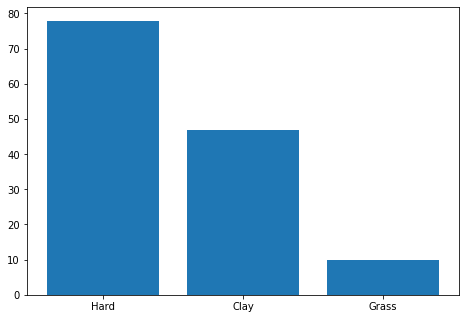

In [86]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
name = ['Hard', 'Clay', 'Grass']
value = [df[(df['surface'] == 'Hard')].count().surface,df[(df['surface'] == 'Clay')].count().surface,df[(df['surface'] == 'Grass')].count().surface]
ax.bar(name, value)
plt.show()

In [90]:
df[(df['surface'] == 'Clay')].count().surface

47

In [211]:
#26
dd = {'Matches': data['tourney_name'], 'surface': data['surface']}
dff = pd.DataFrame(data=dd)

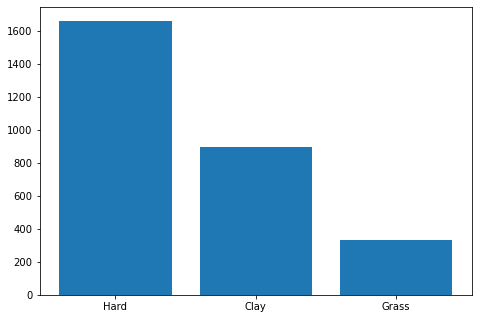

In [215]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
name = ['Hard', 'Clay', 'Grass']
value = [dff[(dff['surface'] == 'Hard')].count().surface,dff[(dff['surface'] == 'Clay')].count().surface,dff[(dff['surface'] == 'Grass')].count().surface]
ax.bar(name, value)
plt.show()

In [218]:
dff[(dff['surface'] == 'Grass')].count().surface

331

In [43]:
print(data[ (data['winner_name'] == 'Dominic Thiem') & (data['loser_name'] == 'Stefanos Tsitsipas')])

     tourney_id          tourney_name surface  draw_size tourney_level  \
54    2018-0451                  Doha    Hard         32             A   
778   2018-M006  Indian Wells Masters    Hard        128             M   
1504   2018-520         Roland Garros    Clay        128             G   

      tourney_date  match_num  winner_id  winner_seed winner_entry  ...  \
54        20180101        297     106233          1.0          NaN  ...   
778       20180305        262     106233          5.0          NaN  ...   
1504      20180528        188     106233          7.0          NaN  ...   

     l_1stWon l_2ndWon  l_SvGms l_bpSaved  l_bpFaced  winner_rank  \
54       32.0     11.0     11.0       2.0        5.0          5.0   
778      32.0     21.0     13.0       7.0       11.0          6.0   
1504     48.0     25.0     18.0       8.0       13.0          8.0   

      winner_rank_points loser_rank loser_rank_points    id  
54                4015.0       91.0             606.0    54  
7

In [44]:
print(data[ (data['winner_name'] == 'Stefanos Tsitsipas') & (data['loser_name'] == 'Dominic Thiem')])

     tourney_id    tourney_name surface  draw_size tourney_level  \
1138  2018-0425       Barcelona    Clay         64             A   
2134  2018-0421  Canada Masters    Hard         64             M   

      tourney_date  match_num  winner_id  winner_seed winner_entry  ...  \
1138      20180423        295     126774          NaN          NaN  ...   
2134      20180806        273     126774          NaN          NaN  ...   

     l_1stWon l_2ndWon  l_SvGms l_bpSaved  l_bpFaced  winner_rank  \
1138     19.0      9.0      8.0       4.0        8.0         63.0   
2134     31.0     13.0     10.0       0.0        1.0         27.0   

      winner_rank_points loser_rank loser_rank_points    id  
1138               822.0        7.0            3755.0  1138  
2134              1534.0        8.0            3665.0  2134  

[2 rows x 50 columns]


### Centralnost mreze

In [110]:
C_star = (G.number_of_nodes()-1)*(G.number_of_nodes()-1)
C_star

174724

In [130]:
C_graph = 0
for i in range(G.number_of_nodes()):
    C_graph += max(list(G.degree), key=lambda x: x[1])[1] - list(G.degree)[i][1]
C_graph

20581

In [132]:
Cen = C_graph/C_star
Cen

0.11779148829010325

### Mreza Velike trojke

In [158]:
VT = G.copy()
for node in list(G.nodes):
    if not G.has_edge(node, 'Novak Djokovic') and not G.has_edge(node, 'Rafael Nadal') and not G.has_edge(node, 'Roger Federer'):
        print(node)
        VT.remove_node(node)
        

Nicolas Alvarez
Joao Domingues
Ignacio Garcia
Stefan Kozlov
Pedja Krstin
Jay Clarke
Marcelo Arevalo
Frederico Ferreira Silva
Benjamin Hassan
Artem Smirnov
Thiago Seyboth Wild
Julien Cagnina
Alejandro Gonzalez
Peter August Anker
Emil Ruusuvuori
Andrea Arnaboldi
Nicolas Almagro
Yannick Maden
Jurgen Melzer
Bradley Klahn
Pablo Cuevas
Rudolf Molleker
Radu Albot
Stefano Travaglia
Nicolas Kicker
Jack Sock
Benjamin Lock
Sandro Ehrat
Peter Bothwell
Tommy Robredo
M Abid Ali Khan Akbar
Tommy Paul
Quentin Halys
Evgeny Karlovskiy
Brandon Perez
Dimitar Kuzmanov
Mark Chigaazira
Luis Diego Chavez Villalpando
Soufiane El Mesbahi
Altug Celikbilek
Maxime Janvier
Lloyd Harris
Ricardo Ojeda Lara
Aziz Dougaz
Filip Horansky
Mauricio Echazu
Marcos Baghdatis
Pablo Carreno Busta
Ilya Ivashka
Carlos Berlocq
Nino Serdarusic
Taylor Fritz
Pedro Cachin
Anthony Jackie Tang
Thomaz Bellucci
Youssef Hossam
Yuki Bhambri
Ugo Nastasi
Christoffer Konigsfeldt
Yassir Kilani
Ernests Gulbis
Kuan Yi Lee
Sebastian Ofner
Roman Has

In [159]:
print(nx.info(VT))

Name: 
Type: Graph
Number of nodes: 81
Number of edges: 940
Average degree:  23.2099


In [160]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 419
Number of edges: 2489
Average degree:  11.8807


In [162]:
proc = VT.number_of_nodes()/G.number_of_nodes()
proc

0.19331742243436753

In [163]:
output_path = "models/VT_2018.gml"

nx.write_gml(VT, output_path)